In [1]:
import random
import copy
import logging
import sys
import os
import sys
import importlib
import numpy as np
from collections import defaultdict
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
from tools_pattern import get_eucledean_dist
import compress_pickle
import my_plot
from my_plot import MyPlotData, my_box_plot
import seaborn as sns

script_n = 'plot_210614_2b'

data_script = 'batch_210614_stability_vs_redundancy_2b'
db_path = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim2/' \
            f'{data_script}/'

n_mfs = 488
n_grcs = 1459
pattern_type = 'binary'
db = {}
direction = '1'
noise = '0.5'

model = 'shuffle'
db[model] = compress_pickle.load(
    db_path+f'{data_script}_{model}_{pattern_type}_{n_grcs}_{n_mfs}_dir_{direction}_noise_{noise}_0.3_256_40.gz')

model = 'global_random'
db[model] = compress_pickle.load(
    db_path+f'{data_script}_{model}_{pattern_type}_{n_grcs}_{n_mfs}_dir_{direction}_noise_{noise}_0.3_256_40.gz')

def get_average_delta(hist_sum, ref_sum):
    return sum(hist_sum)/len(hist_sum) - ref_sum

def get_signal_variance(hist_sum):
    return np.std(hist_sum, ddof=1)

def get_low_signal_val(hist_sum, pct=.025):
    return sorted(hist_sum, reverse=False)[int(len(hist_sum)*pct)]

def get_signal_variance_width(hist_sum):
    hist_sum = sorted(hist_sum)
    return hist_sum[int(.95*len(hist_sum))] - hist_sum[int(.05*len(hist_sum))]

def get_signal_loss(hist_sum, ref_sum):
    hist_sum = sorted(hist_sum)
    return ref_sum- hist_sum[int(.5*len(hist_sum))]
        


# avg_grc_dim_list = defaultdict(list)
# for ress in db['random']:
#     ress_tries = ress
#     for ress in ress_tries:
# #         print(ress)
#         for noise in ress:
#             res = ress[noise]
#             grc_dim = res['grc_dim']
#             avg_grc_dim_list[noise].append(grc_dim)

# avg_grc_dim = {}
# for noise in avg_grc_dim_list:
#     avg_grc_dim[noise] = sum(avg_grc_dim_list[noise])/len(avg_grc_dim_list[noise])

In [2]:

name_map = {
        'scaleup4': "Observed",
        'global_random': "Global Random",
        'random': "Global Random",
#         'naive_random_17': "Local Random",
        'shuffle': "Shuffle",
}

palette = {
    name_map['scaleup4']: sns.color_palette()[0],
    name_map['global_random']: sns.color_palette()[1],
    name_map['random']: sns.color_palette()[1],
    name_map['shuffle']: sns.color_palette()[2],
#     name_map['naive_random_21']: sns.color_palette()[2],
}


mpd = MyPlotData()
ress_ref = db['shuffle'][0][0]
resss_ref2 = db['shuffle'][0]
for model_name in [
        'shuffle',
        'global_random',
        ]:
    ress = db[model_name]
    ress_tries = ress[0]  # get the first element in tuple
    for n_try, ress in enumerate(ress_tries):
        if n_try >= len(resss_ref2):
            print(n_try)
            continue
        ress_ref2 = resss_ref2[n_try]
        for noise in ress:
            res = ress[noise]
            res_ref2 = ress_ref2[noise]
            mpd.add_data_point(
                model=name_map[model_name],
                avg_delta=get_average_delta(res['hist_sum'], res['ref_sum0']),
                ref_delta=res['ref_delta'],
                variance=get_signal_variance(res['hist_sum']),
                low_signal=get_low_signal_val(res['hist_sum']),
                variance_width=get_signal_variance_width(res['hist_sum']),
                signal_loss=get_signal_loss(res['hist_sum'], res['ref_sum1']),
                noise=noise,
                )

In [3]:
print(res['ref_sum0'])
print(res['ref_sum1'])
print(res['ref_delta'])
print(res['hist_sum'])

308
304
-4
[259, 304, 299, 261, 268, 253, 257, 309, 267, 267, 285, 280, 272, 266, 287, 264, 297, 286, 297, 254, 263, 271, 263, 280, 271, 282, 308, 278, 267, 300, 278, 274, 260, 294, 262, 268, 284, 295, 274, 288, 273, 284, 296, 288, 295, 269, 281, 253, 274, 286, 295, 261, 244, 277, 292, 280, 266, 270, 294, 280, 283, 268, 254, 286, 283, 265, 268, 277, 277, 283, 241, 238, 262, 300, 285, 287, 257, 283, 266, 270, 242, 279, 289, 266, 296, 252, 268, 281, 265, 263, 290, 282, 304, 264, 294, 266, 300, 285, 267, 284, 269, 295, 286, 278, 262, 269, 285, 305, 301, 270, 248, 298, 275, 264, 272, 278, 264, 250, 311, 255, 269, 273, 247, 283, 268, 284, 257, 291, 275, 282, 293, 274, 273, 238, 288, 240, 272, 271, 297, 284, 283, 265, 272, 268, 284, 288, 270, 297, 246, 287, 257, 258, 300, 271, 279, 248, 284, 269, 271, 288, 304, 287, 299, 261, 272, 255, 296, 281, 288, 280, 265, 272, 273, 289, 261, 289, 303, 254, 280, 316, 286, 280, 278, 267, 283, 288, 275, 278, 274, 258, 285, 262, 277, 273, 263, 259, 299, 259

Height: 7.518796992481203, Aspect: 1.33


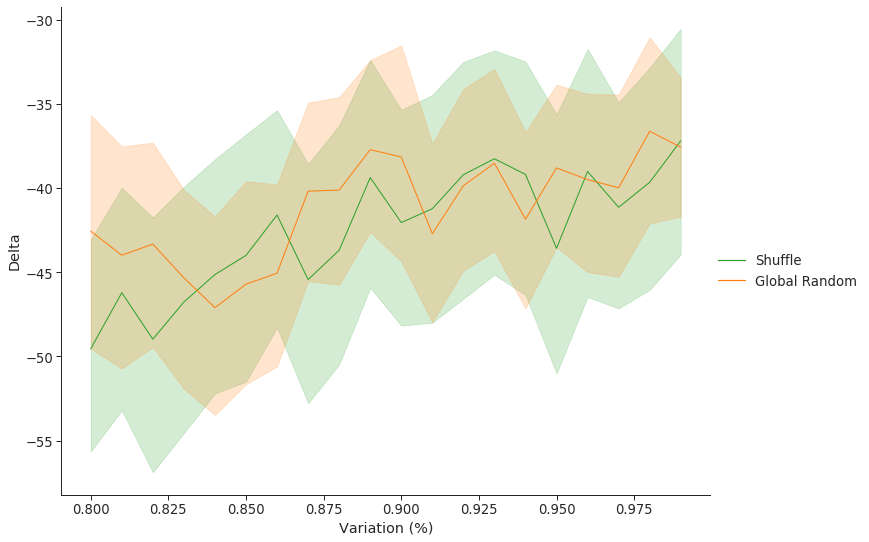

In [5]:

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='avg_delta',
    hue='model',
    context='paper',
    palette=palette,
    linewidth=1,
    width=10,
#     ylim=[0, None],
#     xlim=[0, 150],
    y_axis_label='Delta',
    x_axis_label='Variation (%)',
    save_filename=f'{script_n}.svg',
    show=True,
    )
